# Multiple files with varying f_min and f_max

In [5]:
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager,FitQuality, find_files, write_fit_results_to_file
import numpy as np

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

# Define initial guesses and bounds for each 
Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05]  # Upper bounds
    )

rrcrccpe_model = RRCRCCPEModel(initial_guess, bounds)
param_names = rrcrccpe_model.param_names

fmin_values = np.logspace(np.log10(4), np.log10(8e2), num=5)
fmax_values = np.logspace(np.log10(1100), np.log10(1e6), num=5)

for i, fmin in enumerate(fmin_values):
    for j, fmax in enumerate(fmax_values):
        print (i,j,fmin,fmax)
        residuals = []
        
        for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:
            Ewe = data_handler.Ewe
            
            fit_manager = FitManager(data_handler)
            model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)

0 0 4.0 1099.9999999999998
0 1 4.0 6040.105354537234
0 2 4.0 33166.24790355401
0 3 4.0 182116.0286837872
0 4 4.0 1000000.0
1 0 15.042412372345579 1099.9999999999998
1 1 15.042412372345579 6040.105354537234
1 2 15.042412372345579 33166.24790355401
1 3 15.042412372345579 182116.0286837872
1 4 15.042412372345579 1000000.0
2 0 56.56854249492382 1099.9999999999998
2 1 56.56854249492382 6040.105354537234
2 2 56.56854249492382 33166.24790355401
2 3 56.56854249492382 182116.0286837872
2 4 56.56854249492382 1000000.0
3 0 212.73183587779963 1099.9999999999998
3 1 212.73183587779963 6040.105354537234
3 2 212.73183587779963 33166.24790355401
3 3 212.73183587779963 182116.0286837872
3 4 212.73183587779963 1000000.0
4 0 800.0000000000003 1099.9999999999998


/workspaces/EIS_HIROF/classes_EIS.py:233: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model_wrapper,


4 1 800.0000000000003 6040.105354537234
4 2 800.0000000000003 33166.24790355401
4 3 800.0000000000003 182116.0286837872
4 4 800.0000000000003 1000000.0


<Axes: xlabel='Ewe', ylabel='Fit_R1'>

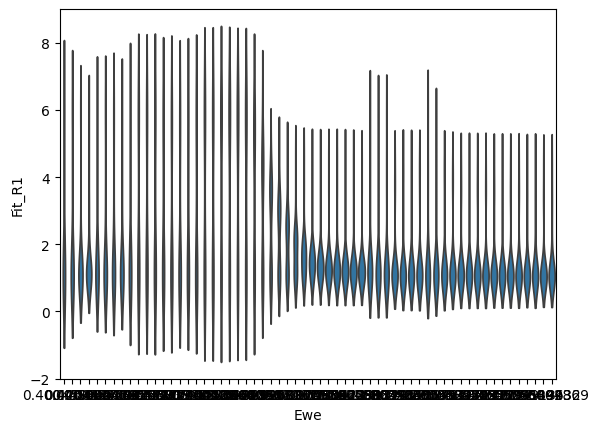

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "100 cycles imped_RRCRCCPEModel_fit_log.csv"
df = pd.read_csv(filename)

param='Fit_R1'

sns.violinplot(x='Ewe', y=param, data=df, inner="quartile")

<ErrorbarContainer object of 3 artists>

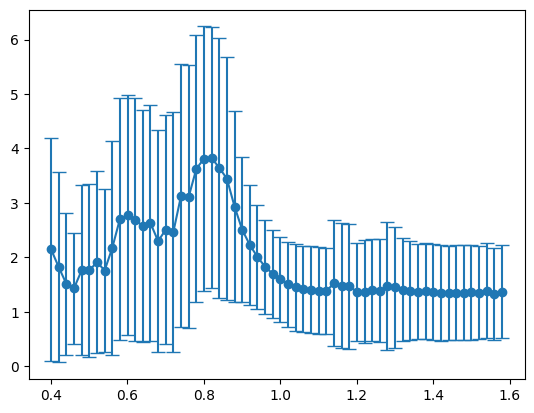

In [17]:

grouped = df.groupby('Ewe').agg(
        mean_param=pd.NamedAgg(column=param, aggfunc='mean'),
        std_param=pd.NamedAgg(column=param, aggfunc='std')
    ).reset_index()

plt.errorbar(grouped['Ewe'], grouped['mean_param'], yerr=grouped['std_param'],
                 fmt='o-', capsize=5, label=f'Mean and Std of {param}')